<a href="https://colab.research.google.com/github/YaelLopezS/Notebooks-Inteligencia-Artificial-2/blob/main/Notebook1_NonlinearRegression_A01664809.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit

# Polinomial Models

In [ ]:
# Sample dataset
data = {
    'Study_Hours': [1,2,3,4,5,6,7,8,9,10],
    'Exam_Score': [50,65,75,80,85,88,89,88,85,80]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)


In [ ]:
# Extract the features (Study_Hours) and target (Exam_Score)
X = df[['Study_Hours']]
y = df['Exam_Score']


In [ ]:
# Fit linear regression for comparison
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_pred = lin_reg.predict(X)

# Fit polynomial regression
poly = PolynomialFeatures(degree=12)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
poly_pred = poly_reg.predict(X_poly)


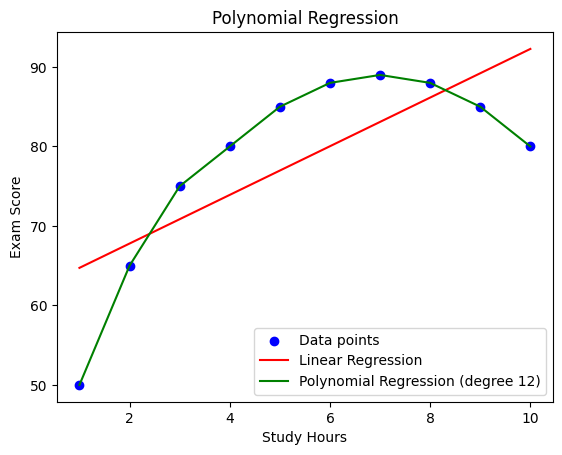

Linear Regression MSE: 61.369696969696975
Polynomial Regression MSE: 4.222186776109006e-13


In [ ]:
# Plot results
plt.scatter(X, y, label="Data points", color="blue")
plt.plot(X, lin_pred, label="Linear Regression", color="red", )
plt.plot(X, poly_pred, label="Polynomial Regression (degree 12)", color="green")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.legend()
plt.title("Polynomial Regression")
plt.show()

# Evaluate the models
lin_mse = mean_squared_error(y, lin_pred)
poly_mse = mean_squared_error(y, poly_pred)
print(f"Linear Regression MSE: {lin_mse}")
print(f"Polynomial Regression MSE: {poly_mse}")


# Exponential regression

        Date  Engaged_Users
0 2022-01-01            100
1 2022-01-02            150
2 2022-01-03            225
3 2022-01-04            338
4 2022-01-05            507
5 2022-01-06            761
6 2022-01-07           1142
7 2022-01-08           1713
8 2022-01-09           2570
9 2022-01-10           3855

Modelo: y = 100.14 * e^(0.4056 * x)
Linear Regression MSE: 261371.25
Exponential Regression MSE: 0.05


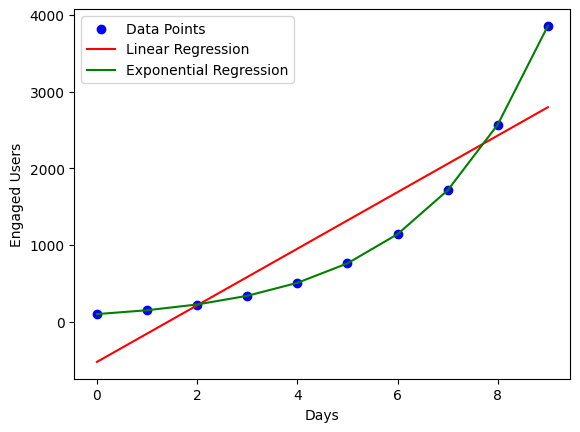

In [ ]:
# Sample dataset
data = {
    'Date': pd.date_range(start='2022-01-01', periods=10),
    'Engaged_Users': [100,150,225,338,507,761,1142,1713,2570,3855]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Extract the features (Date) and target (Engaged_Users)
df['Days'] = (df['Date'] - df['Date'].min()).dt.days
X = df[['Days']]
y = df['Engaged_Users']

# Visualize the data
print(df[['Date', 'Engaged_Users']])


# Fit linear regression for comparison
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_pred = lin_reg.predict(X)


# Fit exponential regression
def exp_func(x, a, b):
    return a * np.exp(b * x)

params, _ = curve_fit(exp_func, df['Days'], y, p0=(100, 0.1))
a, b = params
exp_pred = exp_func(df['Days'], a, b)

print(f"\nModelo: y = {a:.2f} * e^({b:.4f} * x)")


# Evaluate the models
mse_lin = mean_squared_error(y, lin_pred)
mse_exp = mean_squared_error(y, exp_pred)

print(f"Linear Regression MSE: {mse_lin:.2f}")
print(f"Exponential Regression MSE: {mse_exp:.2f}")

plt.scatter(df['Days'], y, color="blue", label="Data Points")
plt.plot(df['Days'], lin_pred, color="red", label="Linear Regression")
plt.plot(df['Days'], exp_pred, color="green", label="Exponential Regression")
plt.xlabel("Days")
plt.ylabel("Engaged Users")
plt.legend()
plt.show()



# Power models

Model: Likes = 0.0326 * Followers^2.3781


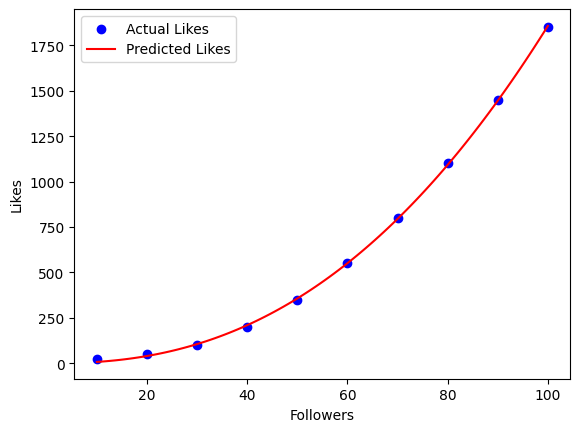

In [ ]:
# Create a DataFrame with the sample data
data = {
    'User_ID': range(1, 11),
    'Followers': np.arange(10, 110, 10),
    'Likes': [25,50,100,200,350,550,800,1100,1450,1850],
    'Shares': [5,10,20,40,70,110,160,220,290,370],
    'Comments': [2,4,8,16,28,44,64,88,116,148]
}
df = pd.DataFrame(data)

# Perform power regression for Likes as an example
def power_func(x, a, b):
    return a * np.power(x, b)

xdata = df['Followers'].values
ydata = df['Likes'].values

params, _ = curve_fit(power_func, xdata, ydata)
a, b = params
print(f"Model: Likes = {a:.4f} * Followers^{b:.4f}")

# Generate a range of Followers values for the fitted curve
x_fit = np.linspace(min(xdata), max(xdata), 100)

# Calculate the predicted Likes using the fitted parameters
y_fit = power_func(x_fit, a, b)

# Create a plot to visualize the relationship
plt.scatter(xdata, ydata, color="blue", label="Actual Likes")
plt.plot(x_fit, y_fit, color="red", label="Predicted Likes")
plt.xlabel("Followers")
plt.ylabel("Likes")
plt.legend()
plt.show()
